In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
import pickle
from keras.models import load_model

In [2]:
%store -r dfbasic2020
%store -r dfdu2020
%store -r dfsc2020
%store -r dfra2020
%store -r dfce2020
%store -r dfcehigh
%store -r dfcelow
%store -r dfcetrend

In [4]:
import os
def ensure_directory_exists(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory created: {directory_path}")
    else:
        print(f"Directory already exists: {directory_path}")
directory_path = './model_saves'
ensure_directory_exists(directory_path)

Directory already exists: ./model_saves


In [5]:
def check_write_permission(directory_path):
    if os.access(directory_path, os.W_OK):
        print(f"Write permission is granted for the directory: {directory_path}")
    else:
        print(f"Write permission is not granted for the directory: {directory_path}")
check_write_permission(directory_path)

Write permission is granted for the directory: ./model_saves


In [ ]:
# PAY ATTENTION 
# the ceemdan part in this code is fault so the ceemdan figure is fault
# and in the other jupyter I run the correct type

Processing dataset: dfbasic2020


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 14s 26ms/step - loss: 0.0336 - val_loss: 0.0361
Epoch 2/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0304 - val_loss: 0.0394
Epoch 3/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0301 - val_loss: 0.0352
Epoch 4/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0298 - val_loss: 0.0350
Epoch 5/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0293 - val_loss: 0.0352
Epoch 6/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0293 - val_loss: 0.0352
Epoch 7/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0294 - val_loss: 0.0346
Epoch 8/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0288 - val_loss: 0.0343
Epoch 9/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0287 - val_loss: 0.0332
Epoch 10/50
463/463 [==============================] - 12s 26ms/step - loss: 0.028

463/463 [==============================] - 11s 25ms/step - loss: 0.0202 - val_loss: 0.0260
Epoch 59/100
463/463 [==============================] - 11s 24ms/step - loss: 0.0199 - val_loss: 0.0242
Epoch 60/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0199 - val_loss: 0.0227
Epoch 61/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0196 - val_loss: 0.0241
Epoch 62/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0196 - val_loss: 0.0241
Epoch 63/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0197 - val_loss: 0.0244
Epoch 64/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0195 - val_loss: 0.0242
Epoch 65/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0194 - val_loss: 0.0264
Epoch 66/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0194 - val_loss: 0.0241
Epoch 67/100
463/463 [==============================] - 11s 25ms/step - loss:

Epoch 15/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0279 - val_loss: 0.0326
Epoch 16/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0277 - val_loss: 0.0325
Epoch 17/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0274 - val_loss: 0.0332
Epoch 18/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0273 - val_loss: 0.0324
Epoch 19/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0272 - val_loss: 0.0318
Epoch 20/50
232/232 [==============================] - 7s 28ms/step - loss: 0.0268 - val_loss: 0.0315
Epoch 21/50
232/232 [==============================] - 6s 28ms/step - loss: 0.0268 - val_loss: 0.0311
Epoch 22/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0266 - val_loss: 0.0306
Epoch 23/50
232/232 [==============================] - 6s 28ms/step - loss: 0.0259 - val_loss: 0.0319
Epoch 24/50
232/232 [==============================] - 7s 28ms/step - loss: 0.0258

232/232 [==============================] - 8s 32ms/step - loss: 0.0205 - val_loss: 0.0236
Epoch 74/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0204 - val_loss: 0.0243
Epoch 75/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0199 - val_loss: 0.0244
Epoch 76/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0199 - val_loss: 0.0232
Epoch 77/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0196 - val_loss: 0.0236
Epoch 78/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0204 - val_loss: 0.0232
Epoch 79/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0199 - val_loss: 0.0236
Epoch 80/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0199 - val_loss: 0.0236
Epoch 81/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0199 - val_loss: 0.0236
Epoch 82/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0199 - 

232/232 [==============================] - 7s 32ms/step - loss: 0.0229 - val_loss: 0.0294
Epoch 53/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0227 - val_loss: 0.0291
Epoch 54/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0225 - val_loss: 0.0293
Epoch 55/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0224 - val_loss: 0.0290
Epoch 56/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0221 - val_loss: 0.0297
Epoch 57/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0223 - val_loss: 0.0283
Epoch 58/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0222 - val_loss: 0.0291
Epoch 59/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0220 - val_loss: 0.0288
Epoch 60/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0217 - val_loss: 0.0289
Epoch 61/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0216 - 

Epoch 31/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0200 - val_loss: 0.0244
Epoch 32/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0200 - val_loss: 0.0227
Epoch 33/100
926/926 [==============================] - 24s 26ms/step - loss: 0.0200 - val_loss: 0.0234
Epoch 34/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0200 - val_loss: 0.0228
Epoch 35/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0196 - val_loss: 0.0226
Epoch 36/100
926/926 [==============================] - 25s 27ms/step - loss: 0.0198 - val_loss: 0.0232
Epoch 37/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0197 - val_loss: 0.0226
Epoch 38/100
926/926 [==============================] - 23s 24ms/step - loss: 0.0198 - val_loss: 0.0231
Epoch 39/100
926/926 [==============================] - 22s 23ms/step - loss: 0.0196 - val_loss: 0.0229
Epoch 40/100
926/926 [==============================] - 22s 23ms

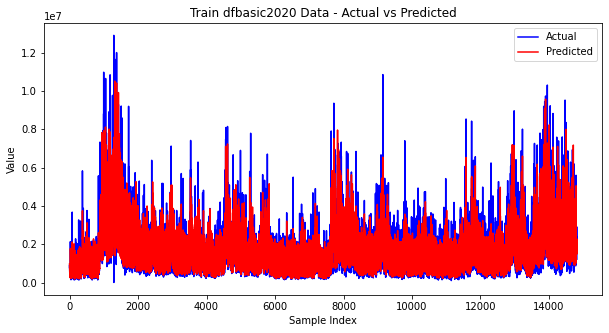

154/154 [==============================] - 1s 9ms/step
Validation dfbasic2020 Data: R^2 Score: 0.7553354419422611, MSE: 416561802769.1417, RMSE: 645415.992030831, MAE: 362104.4830009182, Explained Variance Score: 0.7582615854977937, Median Absolute Error: 223813.5


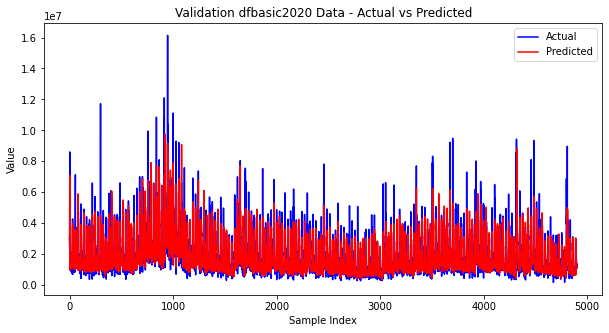

154/154 [==============================] - 1s 9ms/step
Test dfbasic2020 Data: R^2 Score: 0.704793436544253, MSE: 286813570791.3457, RMSE: 535549.7836722052, MAE: 315784.59026927786, Explained Variance Score: 0.7105898928639234, Median Absolute Error: 191329.34375


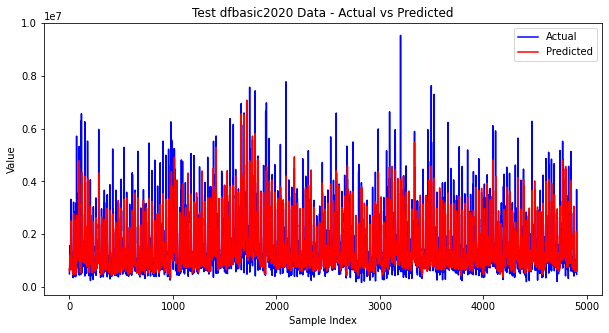

154/154 [==============================] - 1s 9ms/step
Predictions and actual values successfully saved for dfbasic2020.
Total time taken for dfbasic2020: 7606.36 seconds
Processing dataset: dfdu2020


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 16s 28ms/step - loss: 0.0579 - val_loss: 0.0508
Epoch 2/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0383 - val_loss: 0.0374
Epoch 3/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0341 - val_loss: 0.0352
Epoch 4/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0319 - val_loss: 0.0345
Epoch 5/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0306 - val_loss: 0.0322
Epoch 6/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0298 - val_loss: 0.0319
Epoch 7/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0302 - val_loss: 0.0350
Epoch 8/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0292 - val_loss: 0.0327
Epoch 9/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0286 - val_loss: 0.0322
Epoch 10/50
463/463 [==============================] - 13s 27ms/step - loss: 0.028

463/463 [==============================] - 10s 21ms/step - loss: 0.0230 - val_loss: 0.0294
Epoch 31/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0231 - val_loss: 0.0292
Epoch 32/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0229 - val_loss: 0.0285
Epoch 33/50
463/463 [==============================] - 9s 20ms/step - loss: 0.0229 - val_loss: 0.0297
Epoch 34/50
463/463 [==============================] - 11s 23ms/step - loss: 0.0231 - val_loss: 0.0312
Epoch 35/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0229 - val_loss: 0.0282
Epoch 36/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0229 - val_loss: 0.0285
Epoch 37/50
463/463 [==============================] - 10s 22ms/step - loss: 0.0224 - val_loss: 0.0282
Epoch 38/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0225 - val_loss: 0.0292
Epoch 39/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0222 - 

463/463 [==============================] - 11s 24ms/step - loss: 0.0227 - val_loss: 0.0298
Epoch 37/100
463/463 [==============================] - 11s 24ms/step - loss: 0.0229 - val_loss: 0.0292
Epoch 38/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0229 - val_loss: 0.0302
Epoch 39/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0226 - val_loss: 0.0291
Epoch 40/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0224 - val_loss: 0.0290
Epoch 41/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0224 - val_loss: 0.0294
Epoch 42/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0223 - val_loss: 0.0284
Epoch 43/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0224 - val_loss: 0.0296
Epoch 44/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0225 - val_loss: 0.0291
Epoch 45/100
463/463 [==============================] - 11s 23ms/step - loss:

Epoch 44/50
232/232 [==============================] - 8s 34ms/step - loss: 0.0239 - val_loss: 0.0302
Epoch 45/50
232/232 [==============================] - 8s 33ms/step - loss: 0.0236 - val_loss: 0.0314
Epoch 46/50
232/232 [==============================] - 8s 33ms/step - loss: 0.0239 - val_loss: 0.0297
Epoch 47/50
232/232 [==============================] - 7s 32ms/step - loss: 0.0234 - val_loss: 0.0314
Epoch 48/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0238 - val_loss: 0.0291
Epoch 49/50
232/232 [==============================] - 8s 33ms/step - loss: 0.0234 - val_loss: 0.0297
Epoch 50/50
232/232 [==============================] - 2s 10ms/step - loss: 0.0253
Epoch 1/100
232/232 [==============================] - 10s 33ms/step - loss: 0.0572 - val_loss: 0.0466
Epoch 2/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0393 - val_loss: 0.0351
Epoch 3/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0344 - val_loss: 0.035

Epoch 73/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0201 - val_loss: 0.0246
Epoch 74/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0198 - val_loss: 0.0231
Epoch 75/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0223 - val_loss: 0.0294
Epoch 76/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0238 - val_loss: 0.0270
Epoch 77/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0226 - val_loss: 0.0249
Epoch 78/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0219 - val_loss: 0.0248
Epoch 79/100
232/232 [==============================] - 8s 32ms/step - loss: 0.0208 - val_loss: 0.0244
Epoch 80/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0207 - val_loss: 0.0240
Epoch 81/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0206 - val_loss: 0.0236
Epoch 82/100
232/232 [==============================] - 8s 33ms/step - lo

Epoch 52/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0230 - val_loss: 0.0291
Epoch 53/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0226 - val_loss: 0.0287
Epoch 54/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0227 - val_loss: 0.0280
Epoch 55/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0226 - val_loss: 0.0280
Epoch 56/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0228 - val_loss: 0.0298
Epoch 57/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0227 - val_loss: 0.0282
Epoch 58/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0222 - val_loss: 0.0299
Epoch 59/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0225 - val_loss: 0.0287
Epoch 60/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0221 - val_loss: 0.0290
Epoch 61/100
232/232 [==============================] - 7s 30ms/step - lo

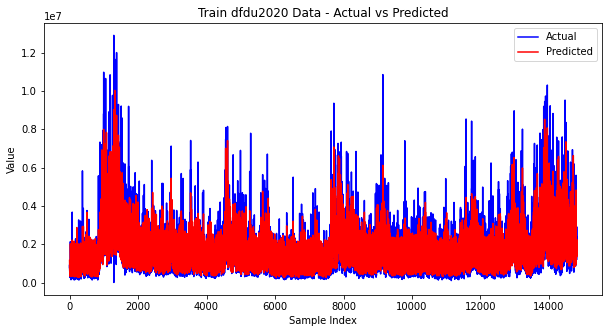

154/154 [==============================] - 1s 9ms/step
Validation dfdu2020 Data: R^2 Score: 0.7207953735685713, MSE: 475369148073.8023, RMSE: 689470.1937530021, MAE: 368604.6696209957, Explained Variance Score: 0.7362565898864625, Median Absolute Error: 217811.0


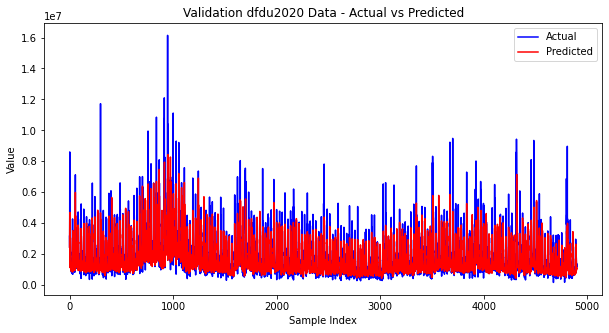

154/154 [==============================] - 1s 9ms/step
Test dfdu2020 Data: R^2 Score: 0.7099110354003507, MSE: 281841469952.4863, RMSE: 530887.4362352968, MAE: 308894.3681979294, Explained Variance Score: 0.7259041108954933, Median Absolute Error: 182118.8125


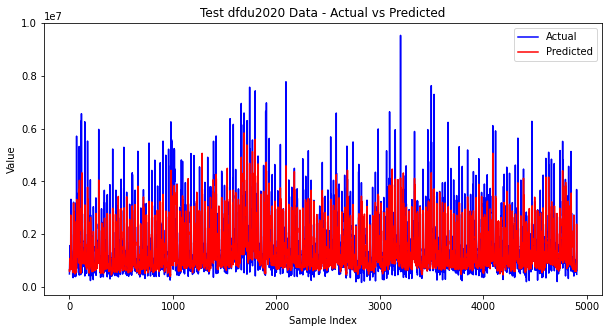

154/154 [==============================] - 1s 9ms/step
Predictions and actual values successfully saved for dfdu2020.
Total time taken for dfdu2020: 7982.05 seconds
Processing dataset: dfsc2020


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 14s 26ms/step - loss: 0.0416 - val_loss: 0.0389
Epoch 2/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0333 - val_loss: 0.0361
Epoch 3/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0320 - val_loss: 0.0372
Epoch 4/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0307 - val_loss: 0.0356
Epoch 5/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0305 - val_loss: 0.0357
Epoch 6/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0304 - val_loss: 0.0349
Epoch 7/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0299 - val_loss: 0.0345
Epoch 8/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0297 - val_loss: 0.0355
Epoch 9/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0294 - val_loss: 0.0341
Epoch 10/50
463/463 [==============================] - 11s 25ms/step - loss: 0.029

463/463 [==============================] - 12s 25ms/step - loss: 0.0211 - val_loss: 0.0244
Epoch 59/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0199 - val_loss: 0.0246
Epoch 60/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0202 - val_loss: 0.0234
Epoch 61/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0199 - val_loss: 0.0250
Epoch 62/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0200 - val_loss: 0.0237
Epoch 63/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0197 - val_loss: 0.0228
Epoch 64/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0200 - val_loss: 0.0226
Epoch 65/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0203 - val_loss: 0.0243
Epoch 66/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0197 - val_loss: 0.0234
Epoch 67/100
463/463 [==============================] - 12s 25ms/step - loss:

232/232 [==============================] - 7s 29ms/step - loss: 0.0286 - val_loss: 0.0334
Epoch 15/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0287 - val_loss: 0.0336
Epoch 16/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0289 - val_loss: 0.0339
Epoch 17/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0285 - val_loss: 0.0327
Epoch 18/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0284 - val_loss: 0.0334
Epoch 19/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0285 - val_loss: 0.0338
Epoch 20/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0283 - val_loss: 0.0332
Epoch 21/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0281 - val_loss: 0.0339
Epoch 22/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0280 - val_loss: 0.0339
Epoch 23/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0280 - val_loss:

Epoch 44/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0243 - val_loss: 0.0323
Epoch 45/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0240 - val_loss: 0.0314
Epoch 46/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0238 - val_loss: 0.0322
Epoch 47/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0239 - val_loss: 0.0322
Epoch 48/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0240 - val_loss: 0.0317
Epoch 49/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0237 - val_loss: 0.0317
Epoch 50/50
232/232 [==============================] - 2s 9ms/step - loss: 0.0265
Epoch 1/100
232/232 [==============================] - 10s 32ms/step - loss: 0.0433 - val_loss: 0.0386
Epoch 2/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0339 - val_loss: 0.0363
Epoch 3/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0327 - val_loss: 0.0383

232/232 [==============================] - 7s 29ms/step - loss: 0.0204 - val_loss: 0.0258
Epoch 74/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0204 - val_loss: 0.0244
Epoch 75/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0211 - val_loss: 0.0246
Epoch 76/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0206 - val_loss: 0.0232
Epoch 77/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0200 - val_loss: 0.0256
Epoch 78/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0203 - val_loss: 0.0244
Epoch 79/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0202 - val_loss: 0.0231
Epoch 80/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0203 - val_loss: 0.0237
Epoch 81/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0204 - val_loss: 0.0236
Epoch 82/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0201 - 

232/232 [==============================] - 7s 29ms/step - loss: 0.0236 - val_loss: 0.0307
Epoch 53/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0234 - val_loss: 0.0306
Epoch 54/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0232 - val_loss: 0.0302
Epoch 55/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0230 - val_loss: 0.0298
Epoch 56/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0228 - val_loss: 0.0297
Epoch 57/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0227 - val_loss: 0.0302
Epoch 58/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0226 - val_loss: 0.0283
Epoch 59/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0221 - val_loss: 0.0303
Epoch 60/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0224 - val_loss: 0.0278
Epoch 61/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0217 - 

Epoch 31/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0208 - val_loss: 0.0242
Epoch 32/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0206 - val_loss: 0.0232
Epoch 33/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0211 - val_loss: 0.0275
Epoch 34/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0213 - val_loss: 0.0253
Epoch 35/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0204 - val_loss: 0.0248
Epoch 36/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0205 - val_loss: 0.0232
Epoch 37/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0202 - val_loss: 0.0235
Epoch 38/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0203 - val_loss: 0.0236
Epoch 39/100
463/463 [==============================] - 12s 27ms/step - loss: 0.0201 - val_loss: 0.0231
Epoch 40/100
463/463 [==============================] - 12s 27ms

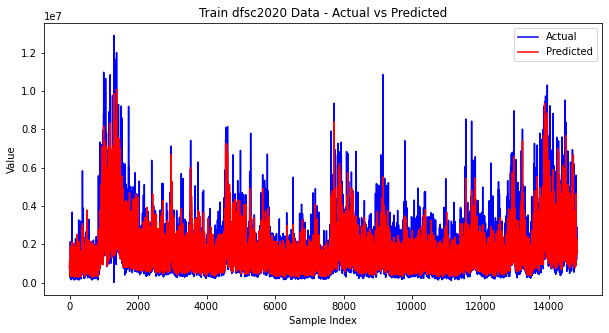

154/154 [==============================] - 1s 9ms/step
Validation dfsc2020 Data: R^2 Score: 0.7316840192522976, MSE: 456830321233.76166, RMSE: 675892.240844472, MAE: 368128.8720988064, Explained Variance Score: 0.7443565679291579, Median Absolute Error: 217314.5


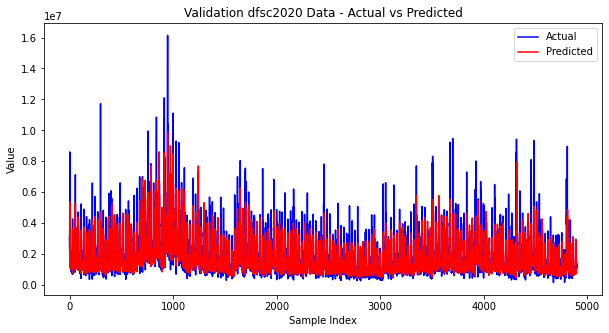

154/154 [==============================] - 1s 9ms/step
Test dfsc2020 Data: R^2 Score: 0.7026084692187102, MSE: 288936417496.9383, RMSE: 537528.062055311, MAE: 311943.99006782944, Explained Variance Score: 0.7159157614271412, Median Absolute Error: 182454.96875


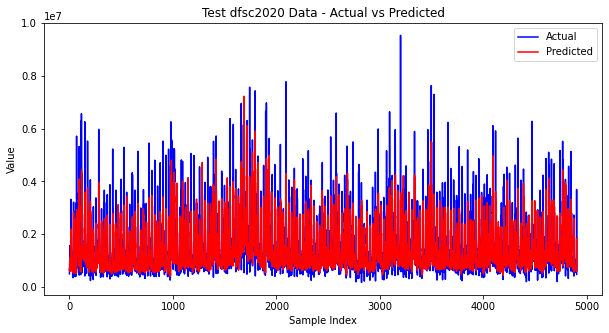

154/154 [==============================] - 1s 9ms/step
Predictions and actual values successfully saved for dfsc2020.
Total time taken for dfsc2020: 6515.55 seconds
Processing dataset: dfra2020


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 14s 26ms/step - loss: 0.0428 - val_loss: 0.0397
Epoch 2/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0339 - val_loss: 0.0375
Epoch 3/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0319 - val_loss: 0.0395
Epoch 4/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0317 - val_loss: 0.0378
Epoch 5/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0307 - val_loss: 0.0353
Epoch 6/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0304 - val_loss: 0.0351
Epoch 7/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0302 - val_loss: 0.0352
Epoch 8/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0300 - val_loss: 0.0361
Epoch 9/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0298 - val_loss: 0.0342
Epoch 10/50
463/463 [==============================] - 12s 25ms/step - loss: 0.029

463/463 [==============================] - 10s 21ms/step - loss: 0.0235 - val_loss: 0.0304
Epoch 31/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0238 - val_loss: 0.0300
Epoch 32/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0233 - val_loss: 0.0308
Epoch 33/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0237 - val_loss: 0.0304
Epoch 34/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0233 - val_loss: 0.0311
Epoch 35/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0229 - val_loss: 0.0299
Epoch 36/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0230 - val_loss: 0.0314
Epoch 37/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0229 - val_loss: 0.0297
Epoch 38/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0231 - val_loss: 0.0291
Epoch 39/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0228 -

463/463 [==============================] - 10s 21ms/step - loss: 0.0230 - val_loss: 0.0291
Epoch 37/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0229 - val_loss: 0.0293
Epoch 38/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0227 - val_loss: 0.0297
Epoch 39/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0226 - val_loss: 0.0277
Epoch 40/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0225 - val_loss: 0.0317
Epoch 41/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0221 - val_loss: 0.0262
Epoch 42/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0219 - val_loss: 0.0271
Epoch 43/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0216 - val_loss: 0.0271
Epoch 44/100
463/463 [==============================] - 10s 21ms/step - loss: 0.0222 - val_loss: 0.0260
Epoch 45/100
463/463 [==============================] - 10s 21ms/step - loss:

Epoch 44/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0234 - val_loss: 0.0317
Epoch 45/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0235 - val_loss: 0.0309
Epoch 46/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0235 - val_loss: 0.0311
Epoch 47/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0236 - val_loss: 0.0308
Epoch 48/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0233 - val_loss: 0.0303
Epoch 49/50
232/232 [==============================] - 9s 38ms/step - loss: 0.0234 - val_loss: 0.0303
Epoch 50/50
232/232 [==============================] - 3s 12ms/step - loss: 0.0261
Epoch 1/100
232/232 [==============================] - 12s 42ms/step - loss: 0.0463 - val_loss: 0.0423
Epoch 2/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0363 - val_loss: 0.0383
Epoch 3/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0326 - val_loss: 0.038

Epoch 73/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0201 - val_loss: 0.0244
Epoch 74/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0200 - val_loss: 0.0239
Epoch 75/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0198 - val_loss: 0.0243
Epoch 76/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0201 - val_loss: 0.0244
Epoch 77/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0199 - val_loss: 0.0237
Epoch 78/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0199 - val_loss: 0.0229
Epoch 79/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0196 - val_loss: 0.0241
Epoch 80/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0202 - val_loss: 0.0237
Epoch 81/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0198 - val_loss: 0.0233
Epoch 82/100
232/232 [==============================] - 9s 40ms/step - lo

Epoch 52/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0228 - val_loss: 0.0301
Epoch 53/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0228 - val_loss: 0.0300
Epoch 54/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0228 - val_loss: 0.0304
Epoch 55/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0227 - val_loss: 0.0301
Epoch 56/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0226 - val_loss: 0.0297
Epoch 57/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0227 - val_loss: 0.0301
Epoch 58/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0225 - val_loss: 0.0292
Epoch 59/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0224 - val_loss: 0.0300
Epoch 60/100
232/232 [==============================] - 9s 39ms/step - loss: 0.0226 - val_loss: 0.0294
Epoch 61/100
232/232 [==============================] - 9s 39ms/step - lo

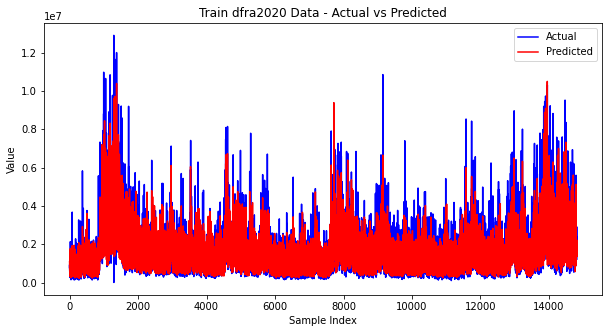

154/154 [==============================] - 1s 9ms/step
Validation dfra2020 Data: R^2 Score: 0.7215059508076597, MSE: 474159331097.9757, RMSE: 688592.2821946059, MAE: 375995.9062308713, Explained Variance Score: 0.7411447532235529, Median Absolute Error: 215296.875


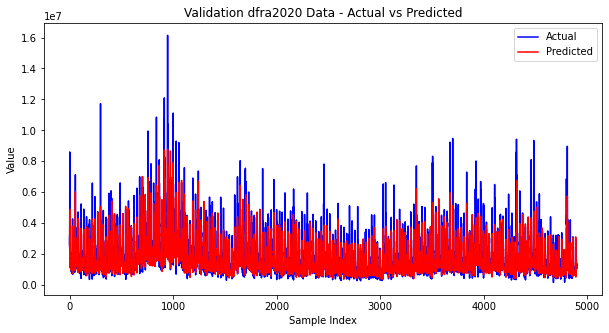

154/154 [==============================] - 1s 9ms/step
Test dfra2020 Data: R^2 Score: 0.6800952836147292, MSE: 310809532638.3435, RMSE: 557502.9440624897, MAE: 320309.94650142797, Explained Variance Score: 0.7018799947771521, Median Absolute Error: 181753.09374999997


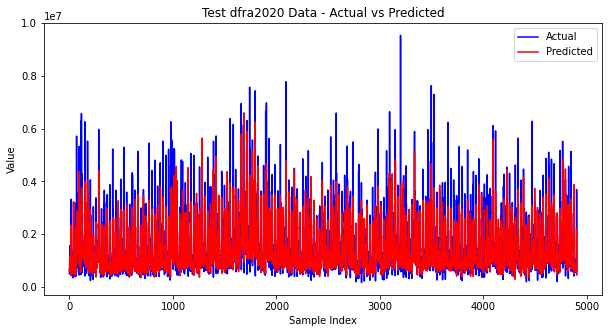

154/154 [==============================] - 1s 9ms/step
Predictions and actual values successfully saved for dfra2020.
Total time taken for dfra2020: 33597.05 seconds
Processing dataset: dfcehigh


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 15s 27ms/step - loss: 0.0704 - val_loss: 0.0477
Epoch 2/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0425 - val_loss: 0.0290
Epoch 3/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0305 - val_loss: 0.0188
Epoch 4/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0239 - val_loss: 0.0154
Epoch 5/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0206 - val_loss: 0.0133
Epoch 6/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0167 - val_loss: 0.0093
Epoch 7/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0142 - val_loss: 0.0083
Epoch 8/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0120 - val_loss: 0.0072
Epoch 9/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0103 - val_loss: 0.0063
Epoch 10/50
463/463 [==============================] - 12s 26ms/step - loss: 0.009

463/463 [==============================] - 10s 21ms/step - loss: 0.0057 - val_loss: 0.0044
Epoch 31/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 32/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 33/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0056 - val_loss: 0.0039
Epoch 34/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 35/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 36/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 37/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 38/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 39/50
463/463 [==============================] - 10s 21ms/step - loss: 0.0056 -

463/463 [==============================] - 13s 29ms/step - loss: 0.0055 - val_loss: 0.0041
Epoch 37/100
463/463 [==============================] - 14s 30ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 38/100
463/463 [==============================] - 13s 27ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 39/100
463/463 [==============================] - 13s 27ms/step - loss: 0.0056 - val_loss: 0.0039
Epoch 40/100
463/463 [==============================] - 13s 27ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 41/100
463/463 [==============================] - 14s 31ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 42/100
463/463 [==============================] - 13s 28ms/step - loss: 0.0054 - val_loss: 0.0037
Epoch 43/100
463/463 [==============================] - 18s 38ms/step - loss: 0.0056 - val_loss: 0.0039
Epoch 44/100
463/463 [==============================] - 14s 30ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 45/100
463/463 [==============================] - 13s 29ms/step - loss:

Epoch 44/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 45/50
232/232 [==============================] - 8s 32ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 46/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 47/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 48/50
232/232 [==============================] - 7s 32ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 49/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0055 - val_loss: 0.0036
Epoch 50/50
232/232 [==============================] - 2s 9ms/step - loss: 0.0064
Epoch 1/100
232/232 [==============================] - 10s 35ms/step - loss: 0.0746 - val_loss: 0.0542
Epoch 2/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0496 - val_loss: 0.0415
Epoch 3/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0396 - val_loss: 0.0281

232/232 [==============================] - 7s 30ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 74/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 75/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 76/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 77/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 78/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 79/100
232/232 [==============================] - 8s 33ms/step - loss: 0.0057 - val_loss: 0.0044
Epoch 80/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 81/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 82/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0059 - 

232/232 [==============================] - 7s 30ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 53/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 54/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 55/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 56/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 57/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 58/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 59/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 60/100
232/232 [==============================] - 7s 31ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 61/100
232/232 [==============================] - 8s 32ms/step - loss: 0.0055 - 

Epoch 31/100
926/926 [==============================] - 22s 24ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 32/100
926/926 [==============================] - 24s 25ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 33/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 34/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 35/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 36/100
926/926 [==============================] - 23s 24ms/step - loss: 0.0056 - val_loss: 0.0036
Epoch 37/100
926/926 [==============================] - 24s 25ms/step - loss: 0.0057 - val_loss: 0.0036
Epoch 38/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 39/100
926/926 [==============================] - 23s 25ms/step - loss: 0.0055 - val_loss: 0.0042
Epoch 40/100
926/926 [==============================] - 23s 25ms

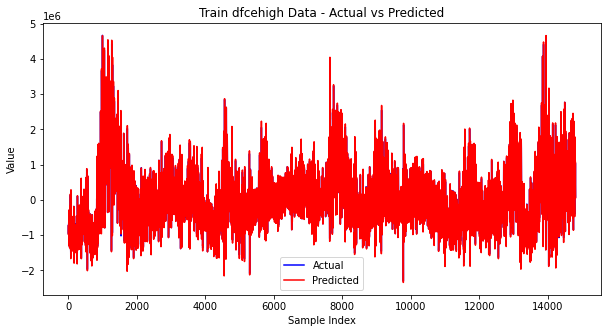

154/154 [==============================] - 1s 9ms/step
Validation dfcehigh Data: R^2 Score: 0.9963577265048987, MSE: 2883561088.5942545, RMSE: 53698.79969416685, MAE: 34912.53574061089, Explained Variance Score: 0.9963631471668741, Median Absolute Error: 23778.341863824113


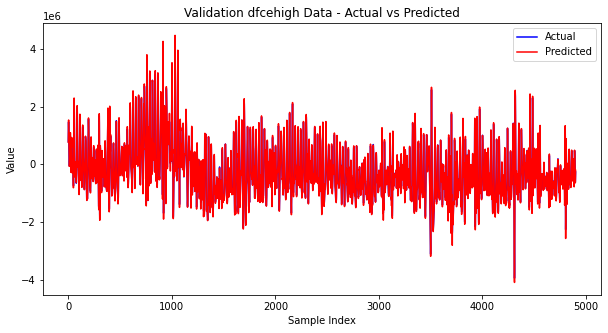

154/154 [==============================] - 2s 10ms/step
Test dfcehigh Data: R^2 Score: 0.9954960393024905, MSE: 1908892511.4617567, RMSE: 43690.874464374785, MAE: 28072.544260596016, Explained Variance Score: 0.9954973343751982, Median Absolute Error: 18530.876520530495


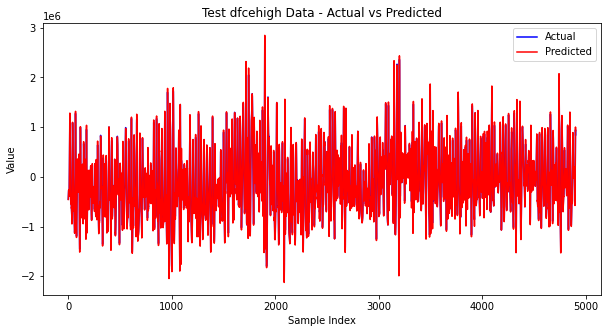

154/154 [==============================] - 1s 9ms/step
Predictions and actual values successfully saved for dfcehigh.
Total time taken for dfcehigh: 8281.78 seconds
Processing dataset: dfcelow


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 15s 27ms/step - loss: 0.0423 - val_loss: 0.0407
Epoch 2/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0360 - val_loss: 0.0360
Epoch 3/50
463/463 [==============================] - 12s 27ms/step - loss: 0.0339 - val_loss: 0.0358
Epoch 4/50
463/463 [==============================] - 13s 27ms/step - loss: 0.0329 - val_loss: 0.0391
Epoch 5/50
463/463 [==============================] - 12s 26ms/step - loss: 0.0319 - val_loss: 0.0361
Epoch 6/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0315 - val_loss: 0.0362
Epoch 7/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0314 - val_loss: 0.0354
Epoch 8/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0310 - val_loss: 0.0359
Epoch 9/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0308 - val_loss: 0.0356
Epoch 10/50
463/463 [==============================] - 12s 25ms/step - loss: 0.030

463/463 [==============================] - 11s 24ms/step - loss: 0.0216 - val_loss: 0.0262
Epoch 59/100
463/463 [==============================] - 11s 24ms/step - loss: 0.0213 - val_loss: 0.0243
Epoch 60/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0214 - val_loss: 0.0251
Epoch 61/100
463/463 [==============================] - 11s 24ms/step - loss: 0.0213 - val_loss: 0.0241
Epoch 62/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0212 - val_loss: 0.0239
Epoch 63/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0212 - val_loss: 0.0242
Epoch 64/100
463/463 [==============================] - 11s 25ms/step - loss: 0.0210 - val_loss: 0.0248
Epoch 65/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0209 - val_loss: 0.0238
Epoch 66/100
463/463 [==============================] - 12s 25ms/step - loss: 0.0211 - val_loss: 0.0255
Epoch 67/100
463/463 [==============================] - 12s 26ms/step - loss:

232/232 [==============================] - 7s 30ms/step - loss: 0.0306 - val_loss: 0.0360
Epoch 15/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0307 - val_loss: 0.0356
Epoch 16/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0307 - val_loss: 0.0355
Epoch 17/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0306 - val_loss: 0.0357
Epoch 18/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0304 - val_loss: 0.0354
Epoch 19/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0302 - val_loss: 0.0355
Epoch 20/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0305 - val_loss: 0.0358
Epoch 21/50
232/232 [==============================] - 7s 32ms/step - loss: 0.0304 - val_loss: 0.0369
Epoch 22/50
232/232 [==============================] - 7s 31ms/step - loss: 0.0303 - val_loss: 0.0358
Epoch 23/50
232/232 [==============================] - 8s 33ms/step - loss: 0.0302 - val_loss:

Epoch 44/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0261 - val_loss: 0.0349
Epoch 45/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0258 - val_loss: 0.0350
Epoch 46/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0259 - val_loss: 0.0347
Epoch 47/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0258 - val_loss: 0.0346
Epoch 48/50
232/232 [==============================] - 7s 30ms/step - loss: 0.0259 - val_loss: 0.0347
Epoch 49/50
232/232 [==============================] - 7s 29ms/step - loss: 0.0258 - val_loss: 0.0348
Epoch 50/50
232/232 [==============================] - 2s 9ms/step - loss: 0.0294
Epoch 1/100
232/232 [==============================] - 10s 33ms/step - loss: 0.0453 - val_loss: 0.0384
Epoch 2/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0370 - val_loss: 0.0388
Epoch 3/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0349 - val_loss: 0.0361

232/232 [==============================] - 7s 29ms/step - loss: 0.0235 - val_loss: 0.0255
Epoch 74/100
232/232 [==============================] - 8s 34ms/step - loss: 0.0228 - val_loss: 0.0265
Epoch 75/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0229 - val_loss: 0.0272
Epoch 76/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0222 - val_loss: 0.0258
Epoch 77/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0224 - val_loss: 0.0262
Epoch 78/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0223 - val_loss: 0.0259
Epoch 79/100
232/232 [==============================] - 7s 29ms/step - loss: 0.0216 - val_loss: 0.0247
Epoch 80/100
232/232 [==============================] - 7s 32ms/step - loss: 0.0224 - val_loss: 0.0254
Epoch 81/100
232/232 [==============================] - 8s 32ms/step - loss: 0.0216 - val_loss: 0.0242
Epoch 82/100
232/232 [==============================] - 7s 30ms/step - loss: 0.0214 - 

232/232 [==============================] - 6s 27ms/step - loss: 0.0258 - val_loss: 0.0351
Epoch 53/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0259 - val_loss: 0.0344
Epoch 54/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0257 - val_loss: 0.0344
Epoch 55/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0259 - val_loss: 0.0341
Epoch 56/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0256 - val_loss: 0.0343
Epoch 57/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0256 - val_loss: 0.0350
Epoch 58/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0258 - val_loss: 0.0355
Epoch 59/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0255 - val_loss: 0.0347
Epoch 60/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0256 - val_loss: 0.0339
Epoch 61/100
232/232 [==============================] - 6s 27ms/step - loss: 0.0256 - 

Epoch 31/100
926/926 [==============================] - 20s 21ms/step - loss: 0.0219 - val_loss: 0.0249
Epoch 32/100
926/926 [==============================] - 20s 22ms/step - loss: 0.0218 - val_loss: 0.0253
Epoch 33/100
926/926 [==============================] - 21s 22ms/step - loss: 0.0214 - val_loss: 0.0247
Epoch 34/100
926/926 [==============================] - 20s 22ms/step - loss: 0.0215 - val_loss: 0.0260
Epoch 35/100
926/926 [==============================] - 20s 22ms/step - loss: 0.0210 - val_loss: 0.0286
Epoch 36/100
926/926 [==============================] - 20s 21ms/step - loss: 0.0212 - val_loss: 0.0258
Epoch 37/100
926/926 [==============================] - 21s 23ms/step - loss: 0.0208 - val_loss: 0.0244
Epoch 38/100
926/926 [==============================] - 20s 22ms/step - loss: 0.0208 - val_loss: 0.0252
Epoch 39/100
926/926 [==============================] - 20s 21ms/step - loss: 0.0208 - val_loss: 0.0250
Epoch 40/100
926/926 [==============================] - 20s 21ms

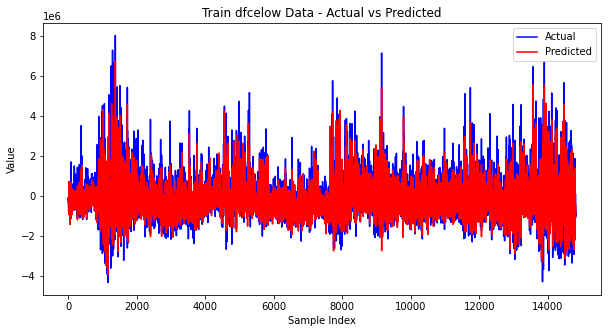

154/154 [==============================] - 1s 8ms/step
Validation dfcelow Data: R^2 Score: 0.6807530507746712, MSE: 349110957891.44214, RMSE: 590856.1228348592, MAE: 373759.5127072315, Explained Variance Score: 0.6898106792236556, Median Absolute Error: 252794.3216684818


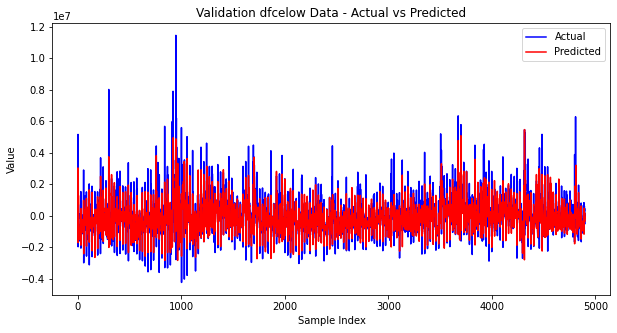

154/154 [==============================] - 1s 8ms/step
Test dfcelow Data: R^2 Score: 0.6755240458327587, MSE: 221428878067.49918, RMSE: 470562.29987909057, MAE: 314476.4782993492, Explained Variance Score: 0.6892096866506903, Median Absolute Error: 216755.17140544855


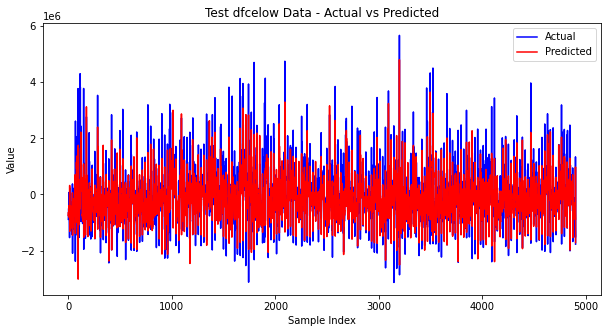

154/154 [==============================] - 1s 8ms/step
Predictions and actual values successfully saved for dfcelow.
Total time taken for dfcelow: 7328.75 seconds
Processing dataset: dfcetrend


C:\Users\lenovo\AppData\Local\Temp\ipykernel_51288\3686623199.py:113: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)


Epoch 1/50
463/463 [==============================] - 15s 27ms/step - loss: 0.0321 - val_loss: 0.0496
Epoch 2/50
463/463 [==============================] - 12s 25ms/step - loss: 0.0225 - val_loss: 0.0243
Epoch 3/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0214 - val_loss: 0.0667
Epoch 4/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0202 - val_loss: 0.0389
Epoch 5/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0189 - val_loss: 0.0069
Epoch 6/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0192 - val_loss: 0.0044
Epoch 7/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0184 - val_loss: 0.0125
Epoch 8/50
463/463 [==============================] - 11s 24ms/step - loss: 0.0184 - val_loss: 0.0459
Epoch 9/50
463/463 [==============================] - 11s 25ms/step - loss: 0.0186 - val_loss: 0.0335
Epoch 10/50
463/463 [==============================] - 12s 25ms/step - loss: 0.017

463/463 [==============================] - 11s 23ms/step - loss: 0.0164 - val_loss: 0.0169
Epoch 59/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0167 - val_loss: 0.0020
Epoch 60/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0160 - val_loss: 0.0217
Epoch 61/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0166 - val_loss: 0.0124
Epoch 62/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0167 - val_loss: 0.0097
Epoch 63/100
463/463 [==============================] - 10s 22ms/step - loss: 0.0167 - val_loss: 0.0053
Epoch 64/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0167 - val_loss: 0.0066
Epoch 65/100
463/463 [==============================] - 11s 23ms/step - loss: 0.0169 - val_loss: 0.0016
Epoch 66/100
463/463 [==============================] - 10s 23ms/step - loss: 0.0162 - val_loss: 0.0122
Epoch 67/100
463/463 [==============================] - 11s 23ms/step - loss:

232/232 [==============================] - 6s 26ms/step - loss: 0.0174 - val_loss: 0.0301
Epoch 16/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0172 - val_loss: 0.0048
Epoch 17/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0177 - val_loss: 0.0130
Epoch 18/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0173 - val_loss: 0.0175
Epoch 19/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0172 - val_loss: 0.0118
Epoch 20/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0174 - val_loss: 0.0232
Epoch 21/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0174 - val_loss: 0.0038
Epoch 22/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0174 - val_loss: 0.0092
Epoch 23/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0169 - val_loss: 0.0113
Epoch 24/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0169 - val_loss:

Epoch 45/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0129 - val_loss: 0.0337
Epoch 46/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0134 - val_loss: 0.0065
Epoch 47/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0131 - val_loss: 0.0101
Epoch 48/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0124 - val_loss: 0.0045
Epoch 49/50
232/232 [==============================] - 6s 26ms/step - loss: 0.0127 - val_loss: 0.0053
Epoch 50/50
232/232 [==============================] - 2s 8ms/step - loss: 0.0043
Epoch 1/100
232/232 [==============================] - 9s 29ms/step - loss: 0.0332 - val_loss: 0.0326
Epoch 2/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0225 - val_loss: 0.0320
Epoch 3/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0214 - val_loss: 0.0469
Epoch 4/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0202 - val_loss: 0.0673


Epoch 74/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0162 - val_loss: 0.0071
Epoch 75/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0167 - val_loss: 0.0168
Epoch 76/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0165 - val_loss: 0.0080
Epoch 77/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0164 - val_loss: 0.0207
Epoch 78/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0162 - val_loss: 0.0142
Epoch 79/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0163 - val_loss: 0.0049
Epoch 80/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0164 - val_loss: 0.0021
Epoch 81/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0162 - val_loss: 0.0181
Epoch 82/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0159 - val_loss: 0.0240
Epoch 83/100
232/232 [==============================] - 6s 26ms/step - lo

Epoch 53/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0132 - val_loss: 0.0033
Epoch 54/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0127 - val_loss: 0.0260
Epoch 55/100
232/232 [==============================] - 7s 28ms/step - loss: 0.0127 - val_loss: 0.0051
Epoch 56/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0133 - val_loss: 0.0148
Epoch 57/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0130 - val_loss: 0.0033
Epoch 58/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0130 - val_loss: 0.0178
Epoch 59/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0129 - val_loss: 0.0147
Epoch 60/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0129 - val_loss: 0.0215
Epoch 61/100
232/232 [==============================] - 6s 26ms/step - loss: 0.0127 - val_loss: 0.0065
Epoch 62/100
232/232 [==============================] - 6s 26ms/step - lo

Epoch 32/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0148 - val_loss: 0.0120
Epoch 33/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0149 - val_loss: 0.0012
Epoch 34/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0153 - val_loss: 0.0182
Epoch 35/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0150 - val_loss: 0.0344
Epoch 36/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0149 - val_loss: 0.0021
Epoch 37/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0150 - val_loss: 0.0058
Epoch 38/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0148 - val_loss: 0.0046
Epoch 39/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0151 - val_loss: 0.0013
Epoch 40/50
926/926 [==============================] - 19s 21ms/step - loss: 0.0149 - val_loss: 0.0241
Epoch 41/50
926/926 [==============================] - 19s 21ms/step - lo

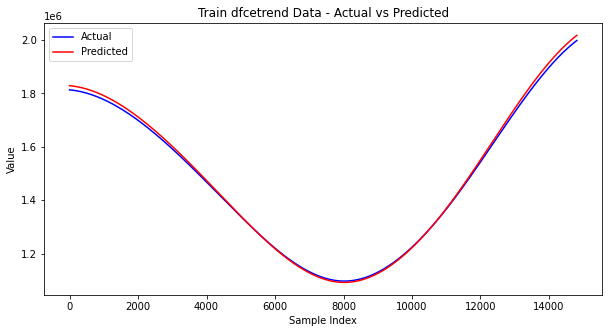

154/154 [==============================] - 1s 8ms/step
Validation dfcetrend Data: R^2 Score: 0.9137446987562032, MSE: 381196161.1895588, RMSE: 19524.24547042878, MAE: 19497.2029682714, Explained Variance Score: 0.9997612257240545, Median Absolute Error: 19939.26127949357


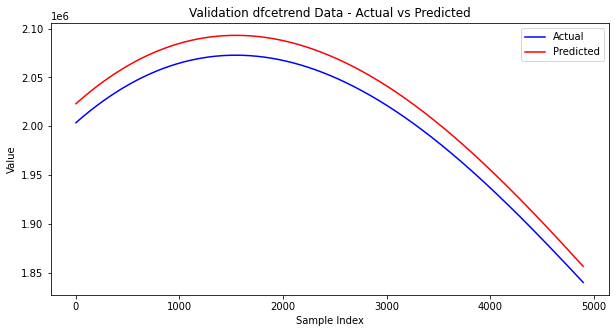

154/154 [==============================] - 1s 7ms/step
Test dfcetrend Data: R^2 Score: 0.9940001100374719, MSE: 98105130.16904975, RMSE: 9904.803388712457, MAE: 9093.548499175105, Explained Variance Score: 0.9990574056722551, Median Absolute Error: 8660.224993314827


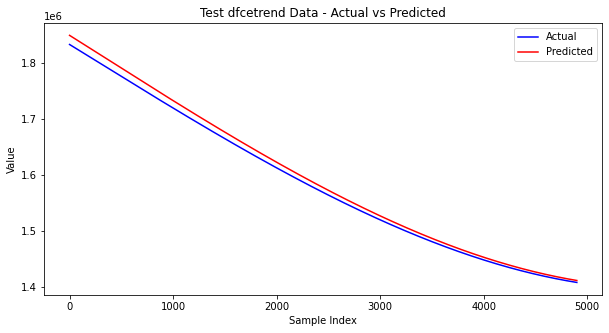

154/154 [==============================] - 1s 8ms/step
Predictions and actual values successfully saved for dfcetrend.
Total time taken for dfcetrend: 5767.26 seconds


In [6]:
# MinMaxScaler
def preprocess_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df.iloc[:, 0:1] = scaler.fit_transform(df.iloc[:, 0:1])  # 只归一化第一列
    return df, scaler

# split_data
def split_data(df):
    train_split = int(len(df) * 0.6)
    validation_split = int(len(df) * 0.8)
    df_for_training = df[:train_split]
    df_for_validation = df[train_split:validation_split]
    df_for_testing = df[validation_split:]
    return df_for_training, df_for_validation, df_for_testing

# create_dataset
def create_dataset(dataset, n_past):
    dataX, dataY = [], []
    for i in range(n_past, len(dataset)):
        dataX.append(dataset.iloc[i - n_past:i, :].values)  # Assume all columns except target are features
        dataY.append(dataset.iloc[i, 0])  # Assuming target is the first column
    return np.array(dataX), np.array(dataY)

# build_model LSTM 
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))
    return model

def keras_model_wrapper(n_past, input_dim):
    def model():
        return build_model((n_past, input_dim))
    return model

# evaluate_model
def evaluate_model(model, X, y, scaler, dataset_type="Test"):
    prediction = model.predict(X)
    prediction = scaler.inverse_transform(prediction.reshape(-1, 1))
    y = scaler.inverse_transform(y.reshape(-1, 1))
    mse = mean_squared_error(y, prediction)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    evs = explained_variance_score(y, prediction)
    medae = median_absolute_error(y, prediction)
    print(f"{dataset_type} Data: R^2 Score: {r2}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}, Explained Variance Score: {evs}, Median Absolute Error: {medae}")
    
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(prediction, label='Predicted', color='red')
    plt.title(f'{dataset_type} Data - Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# know process    
def process_datasets(datasets):
    for name, df in datasets.items():
        print(f"Processing dataset: {name}")
        main(df, name)


# predict_and_save_results 
def predict_and_save_results(model, X, y, scaler, dataset_name):
    try:
        predictions = model.predict(X)
        predictions_inverse = scaler.inverse_transform(predictions.reshape(-1, 1))
        y_inverse = scaler.inverse_transform(y.reshape(-1, 1))
        
        prediction_file = f'predictions_{dataset_name}.pkl'
        true_file = f'true_values_{dataset_name}.pkl'
        
        with open(prediction_file, 'wb') as f:
            pickle.dump(predictions_inverse, f)
        with open(true_file, 'wb') as f:
            pickle.dump(y_inverse, f)
        
        if os.path.exists(prediction_file) and os.path.exists(true_file):
            print(f"Predictions and actual values successfully saved for {dataset_name}.")
        else:
            print(f"Error: File not saved for {dataset_name}.")
            
    except Exception as e:
        print(f"Failed to save predictions for {dataset_name}: {str(e)}")

 # main    
def main(df, dataset_name):
    start_time = time.time()

    df, scaler = preprocess_data(df)

    df_for_training, df_for_validation, df_for_testing = split_data(df)

    # Creat train/val/test
    n_past = 56
    trainX, trainY = create_dataset(df_for_training, n_past)
    valX, valY = create_dataset(df_for_validation, n_past)
    testX, testY = create_dataset(df_for_testing, n_past)

    # Creat model
    model = KerasRegressor(build_fn=keras_model_wrapper(n_past, df_for_training.shape[1]), verbose=1)
    parameters = {'batch_size': [16, 32], 'epochs': [50, 100]}
    
    # grid_search
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=2)
    grid_search_result = grid_search.fit(trainX, trainY, validation_data=(valX, valY))

    # best_model & evaluate_model
    best_model = grid_search_result.best_estimator_.model
    evaluate_model(best_model, trainX, trainY, scaler, f"Train {dataset_name}")
    evaluate_model(best_model, valX, valY, scaler, f"Validation {dataset_name}")
    evaluate_model(best_model, testX, testY, scaler, f"Test {dataset_name}")
    
    # predict_and_save_results
    predict_and_save_results(best_model, testX, testY, scaler, dataset_name)
    
    # save best_model
    best_model.save(f'best_model_{dataset_name}.h5')
    
    # save grid_search_info
    grid_search_info = {
        'best_params': grid_search_result.best_params_,
        'best_score': grid_search_result.best_score_
    }
    with open(f'grid_search_info_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(grid_search_info, f)
    with open(f'scaler_{dataset_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    end_time = time.time()
    print(f"Total time taken for {dataset_name}: {end_time - start_time:.2f} seconds")

if __name__ == "__main__":
    datasets = {
        'dfbasic2020': dfbasic2020,
        'dfdu2020': dfdu2020,
        'dfsc2020': dfsc2020,
        'dfra2020': dfra2020,
        'dfcehigh': dfcehigh,
        'dfcelow': dfcelow,
        'dfcetrend': dfcetrend,
    }
    process_datasets(datasets)

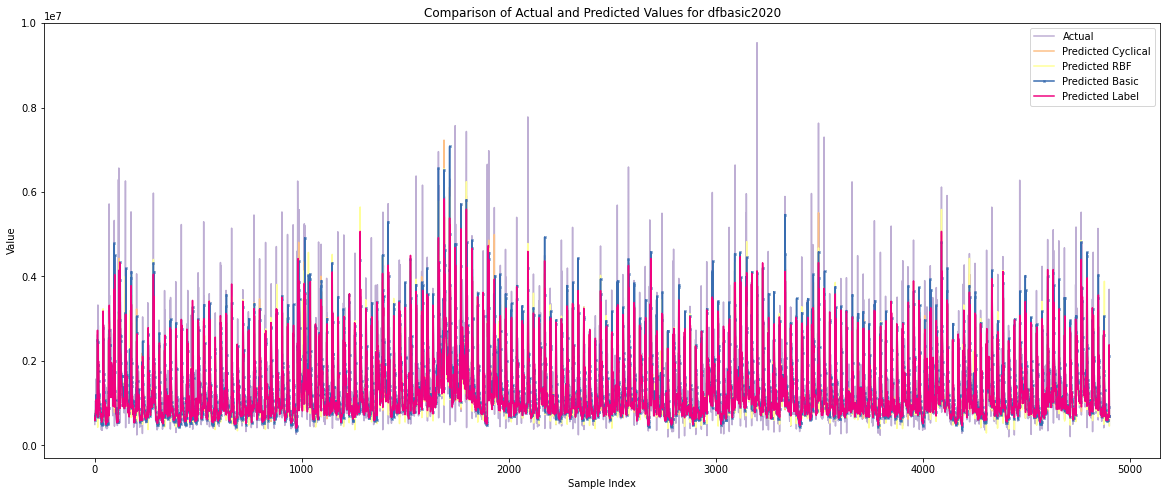

In [92]:
import pickle

def load_and_plot_comparisons(dataset_names, true_dataset_name):
    plt.figure(figsize=(20, 8))
    palette = plt.get_cmap('Accent')

    with open(f'true_values_{true_dataset_name}.pkl', 'rb') as f:
        true_values = pickle.load(f)
    plt.plot(true_values, label=f'Actual', color=palette(1), linestyle='-', markersize=4)

    name_mapping = {
        'dfsc2020': 'Cyclical',
        'dfra2020': 'RBF',
        'dfbasic2020': 'Basic',
        'dfdu2020': 'Label'
    }

    for idx, dataset_name in enumerate(dataset_names):
        with open(f'predictions_{dataset_name}.pkl', 'rb') as f:
            predictions = pickle.load(f)
        if dataset_name == 'dfbasic2020':
            plt.plot(predictions, label=f'Predicted {name_mapping[dataset_name]}', color=palette((idx + 2) % 8), linestyle='-', marker='x', markersize=2)
        else:
            plt.plot(predictions, label=f'Predicted {name_mapping[dataset_name]}', color=palette((idx + 2) % 8), linestyle='-')

    plt.title('Comparison of Actual and Predicted Values for ' + true_dataset_name)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

dataset_names = ['dfsc2020', 'dfra2020', 'dfbasic2020', 'dfdu2020']  
true_dataset_name = 'dfbasic2020' 
load_and_plot_comparisons(dataset_names, true_dataset_name)